<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [175]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"

In [176]:
df = pd.read_csv(house_csv)

In [155]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [7]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [8]:
# ANSWER
df['price']

0       59222
1       68212
2       68880
3       69307
4       81900
        ...  
980    232425
981    234000
982    235000
983    235301
984    235738
Name: price, Length: 985, dtype: int64

#### 2.2 List all possible variables which might be Predictor variable.

In [9]:
# ANSWER
df[['zip','beds','baths','sq__ft']]

,zip,beds,baths,sq__ft
0,95838,2,1,836
1,95823,3,1,1167
2,95815,2,1,796
3,95815,2,1,852
4,95824,2,1,797
...,...,...,...,...
980,95829,4,3,2280
981,95823,3,2,1477
982,95610,3,2,1216
983,95758,4,2,1685


#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [10]:
# ANSWER
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [30]:
# ANSWER
df['y_bar'] = df['price'].mean()
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_bar,y_hat,residual
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,3.370313e+06,-3.311091e+06
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,3.857199e+06,-3.788987e+06
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,3.893377e+06,-3.824497e+06
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,3.916503e+06,-3.847196e+06
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,4.598523e+06,-4.516623e+06


#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [31]:
# ANSWER
res = abs(df['price'] - df['y_bar']).mean()
res

103452.16956891476

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [35]:
# ANSWER
X = df['sq__ft']
Y = df['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [36]:
# ANSWER
def calculate_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y-Ybar) * (X-Xbar))
    d = np.sum(np.square(X - Xbar))
    
    beta_1 = n/d
    return beta_1

In [37]:
b1 = calculate_beta_1(X,Y)
b1

54.158639688530755

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [16]:
# ANSWER
def calculated_beta_0(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - b1 * Xbar
    
    return beta_0

In [17]:
b0 = calculated_beta_0(X,Y)
b0

162930.16140699777

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [18]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x

In [19]:
df['y_hat'] = calculate_yhat(df['price'], b0, b1)
df['y_hat']

0      3.370313e+06
1      3.857199e+06
2      3.893377e+06
3      3.916503e+06
4      4.598523e+06
           ...     
980    1.275075e+07
981    1.283605e+07
982    1.289021e+07
983    1.290651e+07
984    1.293018e+07
Name: y_hat, Length: 985, dtype: float64

##### 2.7.D Find Resudals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [194]:
# ANSWER
df['residual'] = df['price'] - df['y_hat']
df['residual']

0     -148984.784187
1     -157921.293924
2     -137160.438599
3     -139766.322422
4     -124194.597239
           ...      
980    -53986.859897
981     -8922.472227
982      6212.932732
983    -18886.469282
984      -956.228663
Name: residual, Length: 985, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [21]:
# ANSWER
def total_ss(y):
    tss = np.sum(np.square(y - np.mean(y)))
    return tss

def residual_ss(X, Y):
    b1 = calculate_beta_1(X,Y)
    b0 = calculated_beta_0(X,Y)
    y_hat = calculate_yhat(X, b0, b1)
    rss = np.sum(np.square(Y - y_hat))
    return rss
    
def r_sqr(rss, tss):
    r_sqr = 1-(rss/tss)
    return r_sqr
    


In [22]:
tss = total_ss(Y)
print(total_ss(Y))
rss = residual_ss(X,Y)
print(residual_ss(X,Y))

print(r_sqr(rss,tss))

18838783738865.37
16738500924917.504
0.11148717682951459


In [23]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_bar,y_hat,residual
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,3.370313e+06,-3.311091e+06
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,3.857199e+06,-3.788987e+06
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,3.893377e+06,-3.824497e+06
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,3.916503e+06,-3.847196e+06
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,4.598523e+06,-4.516623e+06


##### 2.7.F [BONUS] Draw Plot of Predicted Line

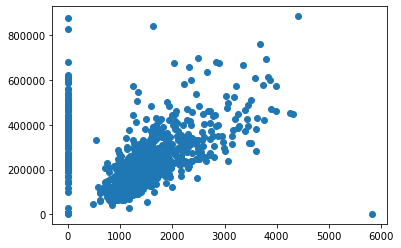

In [54]:
plt.scatter(df['sq__ft'], df['price'])

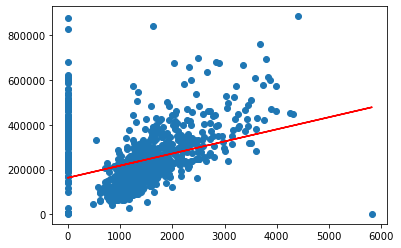

In [79]:
# ANSWER
plt.scatter(df['sq__ft'], df['price'])
plt.plot(df['sq__ft'], df['y_hat'], c='red')

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

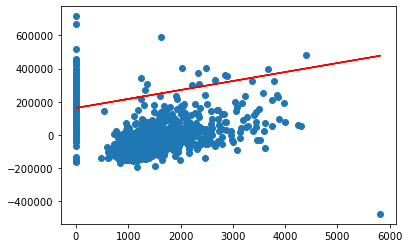

In [197]:
# ANSWER
plt.scatter(df['sq__ft'], df['residual'])
plt.plot(df['sq__ft'], df['y_hat'], c='red')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [156]:
# ANSWER
a = [1204]
a = np.array(a)
a.shape

(1,)

In [157]:
a

array([1204])

In [166]:
a = a.reshape(-1,1)

In [167]:
model.predict(a)

array([228137.16359199])

In [177]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [44]:
from sklearn.linear_model import LinearRegression

In [183]:
X = df[['sq__ft']]
y = df['price']

In [161]:
X.shape

(985, 1)

In [162]:
y.shape

(985,)

In [198]:
model = LinearRegression()
reg = model.fit(X, y)

In [200]:
print(model.intercept_)
print(model.coef_)
print(model.score(X, y))

162930.16140699774
[54.15863969]
0.11148717682951437


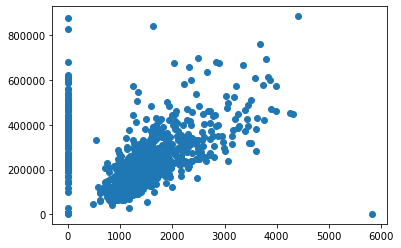

In [184]:
plt.scatter(X, y)

In [188]:
predictions = clf.predict(df[['sq__ft']])
# print(predictions)

In [189]:
df['y_hat'] = predictions

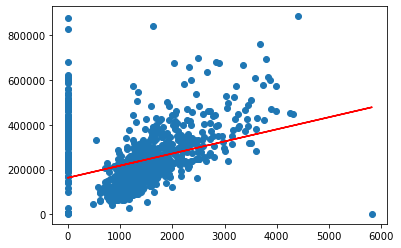

In [190]:
plt.scatter(X, y)
plt.plot(X, df['y_hat'], c='r')

In [182]:
from statsmodels.api import OLS
results = OLS(y,X).fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.739
Model:                            OLS   Adj. R-squared (uncentered):              0.739
Method:                 Least Squares   F-statistic:                              1393.
Date:                Sat, 06 Feb 2021   Prob (F-statistic):                   1.48e-287
Time:                        15:17:47   Log-Likelihood:                         -13061.
No. Observations:                 985   AIC:                                  2.613e+04
Df Residuals:                     983   BIC:                                  2.614e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sq__ft        31.3501      7.122      4.402      0.000      17.373      45.327
beds        5.887e+04   3497.215     16.832      0.000     5.2e+04    6.57e+04
==============================================================================
Omnibus:                      286.867   Durbin-Watson:                   0.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.589
Skew:                           1.520   Prob(JB):                    4.14e-161
Kurtosis:                       5.958   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/jinyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

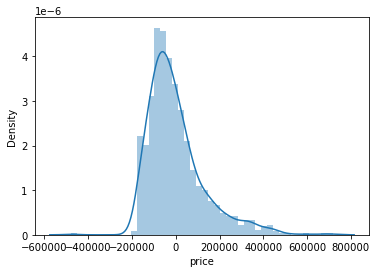

In [43]:
sns.distplot((df['price']-predictions))

In [117]:
np.array(X).reshape(1,-1)

array([[ 836, 1167,  796,  852,  797, 1122, 1104, 1177,  941, 1146,  909,
        1289,  871, 1020, 1022, 1134,  844,  795,  588, 1356, 1118, 1329,
        1240, 1601,  901, 1088,  963, 1119, 1380, 1248, 1039, 1152, 1380,
        1116, 1039, 1418, 1082, 1472, 1146,  760, 1304, 1207, 1056, 1043,
        1587, 1120, 1580, 1955, 1656, 1477, 1188, 1590, 1463, 1714, 1185,
        1406, 1943, 1172, 1152, 1851, 1215, 1130, 1603, 1479, 1420, 1280,
        1586, 1362, 2162, 1266, 1715, 1820,  936,    0, 1511, 1590, 1596,
        1341, 2136, 1616, 1478, 1287, 1277, 1448, 2235, 2093, 1193, 2163,
        1269,    0,  958, 2508, 1305, 1591, 1326, 1843, 1921, 2790, 1541,
        1018,    0, 1672, 1380,  975, 2372, 1446, 1284, 3009, 3612, 2056,
        1993, 1857, 1126, 2213, 2494, 1843, 1520, 2800, 2309, 2367, 3516,
           0, 1914, 1690, 2725, 2354,    0, 2185, 1801, 1961, 3134, 1915,
           0,    0, 2734, 2110, 3164, 3599, 2054, 1830, 1627, 3440, 2846,
        2359, 2052, 3433, 3615,    0, 

In [201]:
import pandas as pd
import statsmodels.formula.api as smf
# x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
# y = [0, 1, 0, 1, 1, 4, 5, 7,0, 1, 0, 1, 1, 4, 5, 7,0, 1, 0, 1, 1, 4, 5, 7]
# d = { "x": pd.Series(x), "y": pd.Series(y)}
x1 = df['sq__ft']
y1 = df['price']
d = { "x": pd.Series(x1), "y": pd.Series(y1)}
df = pd.DataFrame(d)
mod = smf.ols('y ~ x', data=df)
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           4.43e-27
Time:                        19:09:27   Log-Likelihood:                -12999.
No. Observations:                 985   AIC:                         2.600e+04
Df Residuals:                     983   BIC:                         2.601e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.629e+05   7642.244     21.320      0.0



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



